# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Septia Clara Sinaga
- **Email:** M232D4KX2951@bangkit.academy
- **ID Dicoding:** M232D4KX2951

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa total jam penyewaan sepeda tertinggi dalam satu hari yang tercatat dalam data rental sepeda dan apa faktor yang mempengaruhi peningkatan penyewaan sepeda pada hari tersebut?
- Pertanyaan 2: Apakah penyewaan sepeda dipengaruhi oleh kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

DAY

In [ ]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.duplicated().sum()

0

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


HOUR

In [ ]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [ ]:
day_df.dropna(axis=0, inplace=True)

In [ ]:
hour_df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
var_yg_dipilih = ["mnth", "yr", "dteday", "weekday", "weathersit"]
day_df = day_df[var_yg_dipilih]
day_df.head()

,mnth,yr,dteday,weekday,weathersit
0,1,0,2011-01-01,6,2
1,1,0,2011-01-02,0,2
2,1,0,2011-01-03,1,1
3,1,0,2011-01-04,2,1
4,1,0,2011-01-05,3,1


In [ ]:
hour_sum = hour_df.groupby('dteday')['hr'].sum().reset_index()
hour_sum.head()

,dteday,hr
0,2011-01-01,276
1,2011-01-02,271
2,2011-01-03,271
3,2011-01-04,273
4,2011-01-05,273


In [ ]:
merge_df = pd.merge(day_df, hour_sum, on='dteday', how='left')

In [ ]:
bike_df = merge_df.rename(columns={
    "mnth": "month",
    "yr": "year",
    "dteday": "date",
    "weekday": "day_of_week",
    "weathersit": "weather_condition",
    "hr": "hour"
})

print(bike_df.head())

   month  year        date  day_of_week  weather_condition  hour
0      1     0  2011-01-01            6                  2   276
1      1     0  2011-01-02            0                  2   271
2      1     0  2011-01-03            1                  1   271
3      1     0  2011-01-04            2                  1   273
4      1     0  2011-01-05            3                  1   273


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
jam_terbanyak = bike_df.sort_values(by='date', ascending=False)
top5_jam_terbanyak = jam_terbanyak.head(5)
print(top5_jam_terbanyak)

     month  year        date  day_of_week  weather_condition  hour
730     12     1  2012-12-31            1                  2   276
729     12     1  2012-12-30            0                  1   276
728     12     1  2012-12-29            6                  2   276
727     12     1  2012-12-28            5                  2   276
726     12     1  2012-12-27            4                  2   276


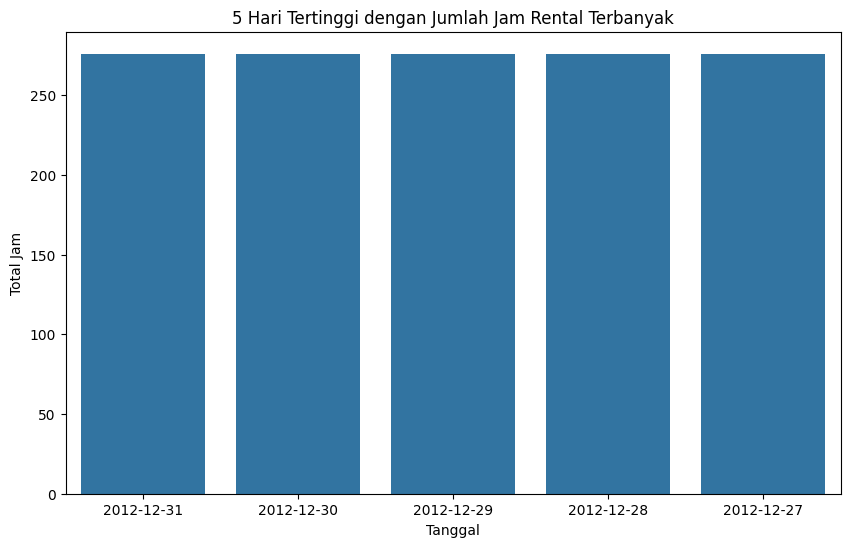

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_jam_terbanyak.date, y=top5_jam_terbanyak.hour)
plt.xlabel('Tanggal')
plt.ylabel('Total Jam')
plt.title('5 Hari Tertinggi dengan Jumlah Jam Rental Terbanyak')
plt.show()


Terlihat bahwa dari tanggal 27-12-2012 sampai dengan 31-12-2012 menjadi 5 hari tertinggi dengan jumlah jam rental terbanyak yaitu 276 jam pada tiap harinya.

### Pertanyaan 2:

In [ ]:
weathersit_nilai = day_df['weathersit'].value_counts()
weathersit_nilai = weathersit_nilai.rename({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain'})
print(weathersit_nilai)


Clear              463
Mist + Cloudy      247
Light Snow/Rain     21
Name: weathersit, dtype: int64


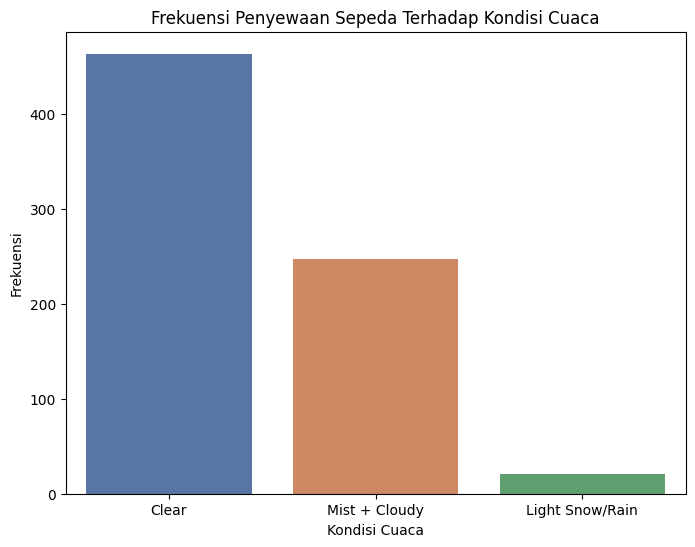

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=weathersit_nilai.index, y=weathersit_nilai.values, hue=weathersit_nilai.index, palette='deep', legend=False)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Penyewaan Sepeda Terhadap Kondisi Cuaca')
plt.show()

Terlihat bahwa jumlah penyewaan sepeda paling tinggi terjadi saat kondisi cuaca adalah Clear, Few clouds, Partly cloudy, Partly cloudy  dengan total frekuensi penyewaan mencapai 463. Kemudian saat kondisi cuaca adalah Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist frekuensi penyewaan sepeda adalah 247. Lalu saat kondisi cuaca adalah Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds frekuensi penyewaan sepeda adalah 21. Terakhir, saat kondisi Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog frekuensi penyewaan sepeda adalah 0.

## Conclusion

- Conclution pertanyaan 1:

Pada hasil barplot yang ditampilkan untuk pertanyaan pertama terlihat bahwa 5 tanggal dengan jumlah jam penyewaan sepeda tertinggi adalah dari tanggal 27-12-2012 hingga 31-12-2012. Dari data ini, dapat disimpulkan bahwa periode tersebut mungkin merupakan hari libur sekolah atau libur pekerjaan dengan konteks liburan pergantian tahun.

Dalam konteks ini, masyarakat cenderung memiliki lebih banyak waktu luang untuk beraktivitas termasuk bersepeda. Libur sekolah atau pekerjaan pada akhir tahun sering kali menjadi waktu yang dinantikan untuk bersantai dan menikmati momen bersama keluarga atau teman-teman. Penggunaan sepeda sebagai salah satu sarana rekreasi saat libur dapat menjelaskan mengapa jumlah penyewaan sepeda meningkat pada periode tersebut.

Dengan demikian, meningkatnya jumlah penyewaan sepeda pada tanggal-tanggal tersebut dapat diatribusikan kepada kegiatan liburan akhir tahun yang memberikan kesempatan bagi masyarakat untuk menikmati aktivitas rekreasi seperti bersepeda. Liburan ini juga memberikan kesempatan bagi masyarakat untuk melepaskan diri dari rutinitas sehari-hari dan menikmati waktu bersantai dengan menggunakan sepeda.

- Conclution pertanyaan 2:

Pada hasil barplot yang ditampilkan untuk pertanyaan kedua terlihat bahwa frekuensi penyewaan sepeda berdasarkan kondisi cuaca bervariasi. Dari data yang dianalisis, terlihat bahwa jumlah penyewaan sepeda paling tinggi terjadi saat kondisi cuaca adalah Clear, Few clouds, Partly cloudy, Partly cloudy  dengan total frekuensi penyewaan mencapai 463. Hal ini menunjukkan bahwa masyarakat cenderung lebih aktif meminjam sepeda saat cuaca cerah atau sedikit berawan.

Sementara itu, saat kondisi cuaca adalah Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist serta saat kondisi cuaca adalah Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, atau Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, terlihat bahwa jumlah frekuensi penyewaan sepeda cenderung lebih rendah. Hal ini memungkinkan disebabkan oleh kondisi cuaca yang kurang mendukung untuk bersepeda, seperti hujan, kabut, atau salju yang membuat masyarakat enggan untuk beraktivitas dalam hal meminjam sepeda.

Dari analisis ini dapat disimpulkan bahwa kondisi cuaca memainkan peran penting dalam menentukan tingkat aktivitas penyewaan sepeda. Cuaca yang cerah dan cuaca yang tidak ekstrem cenderung meningkatkan jumlah penyewaan sepeda, sementara cuaca yang buruk atau cuaca ekstrem cenderung mengurangi minat masyarakat untuk bersepeda.

## Dashboard

URL : https://r38d6c9bazdf7t9mhrbtup.streamlit.app/



Local URL: http://localhost:8501

Network URL: http://192.168.1.4:8501